In [ ]:
# import MNIST from Keras

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [ ]:
# Seed data
np.random.seed(0)

In [ ]:
# import our data which are image pixels for train data, test data set
#60000 images loaded, each image size : 28x28 pixels

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
60000


In [ ]:
# data load control : to be sure that the expected data is correct
# debugging method for complex models

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

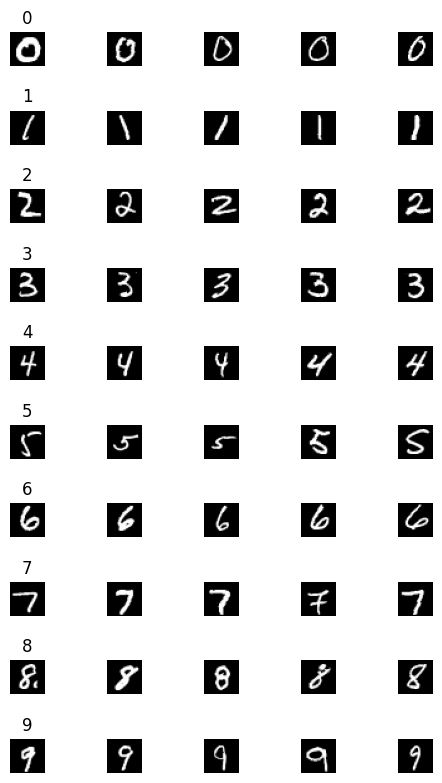

In [ ]:
# image recorder 10 classes
num_of_samples = []

# create grid of digit
cols = 5 # coloums
num_classes = 10 # row  : label classes
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))

# plot figure layout
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        # imshow() fun : display a selected random image (28x28)
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        # drop out the axis names for cleaning
        axs[j][i].axis("off")
        # to show the label for a appropriated class
        if i == 0:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

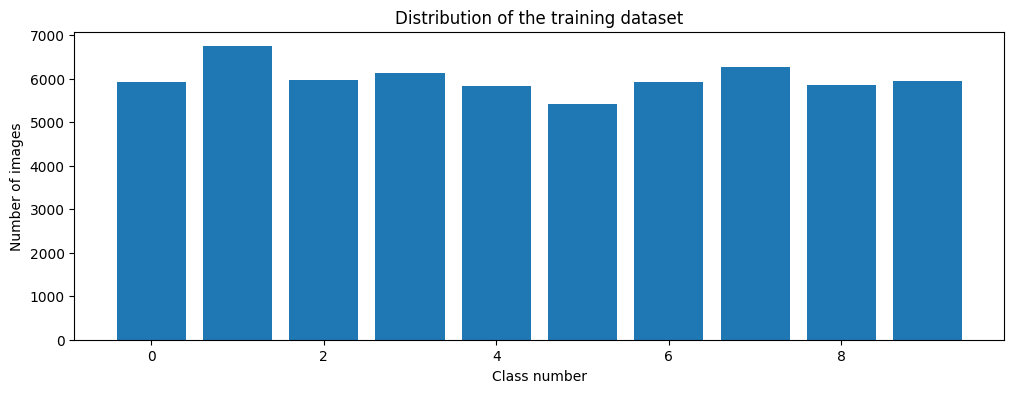

In [ ]:
# print the number of the image per class

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [ ]:
# create a separe label applying "hot encoding" techniques

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# normalization (1 pixel : 8 Bytes => 0 - 255)

X_train = X_train/255
X_test = X_test/255
num_pixels = 784

# reshape the image to a single matrix for the multiplication

X_train = X_train.reshape(X_train.shape[0], num_pixels)
print(X_train.shape)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Linear NN is NOT scalable when dealing with more complex data

model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 8600 (33.59 KB)
Trainable params: 8600 (33.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1965 - accuracy: 0.9440 - val_loss: 0.1779 - val_accuracy: 0.9495
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1920 - accuracy: 0.9446 - val_loss: 0.1753 - val_accuracy: 0.9503
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1856 - accuracy: 0.9469 - val_loss: 0.1738 - val_accuracy: 0.9507
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1822 - accuracy: 0.9486 - val_loss: 0.1712 - val_accuracy: 0.9523
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1794 - accuracy: 0.9485 - val_loss: 0.1775 - val_accuracy: 0.9493
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1749 - accuracy: 0.9495 - val_loss: 0.1651 - val_accuracy: 0.9530
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1726 - accuracy: 0.9500 - val_loss: 0.1679 - val_accuracy: 0.9517
Epoch 

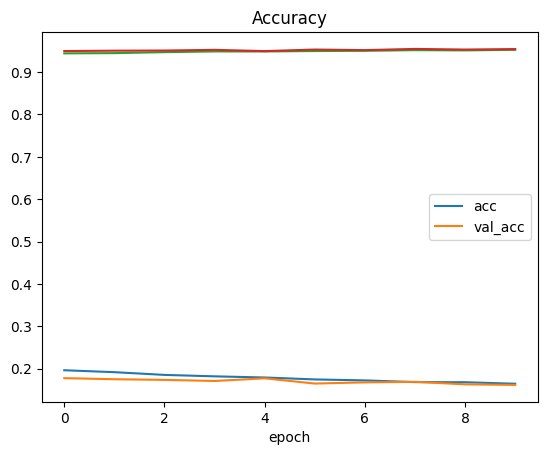

In [ ]:
# Train the model

"""
Model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1, =>
    verbose=1,
    callbacks=None,
    validation_split=0.0, => 10% (0.1) of the data is used for validation
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
"""
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 95ms/step
predicted digit: 2


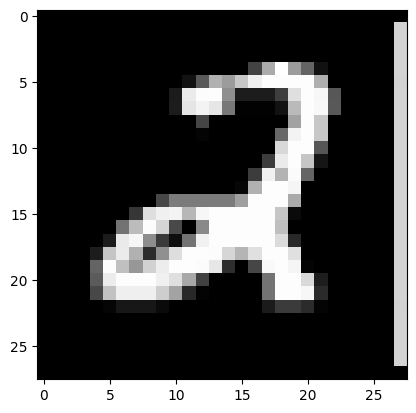

In [ ]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

# normalization
img = img/255

# convert the pixel input to a single matrix
img = img.reshape(1, 784)


prediction = model.predict(img)
predicted_class = np.argmax(prediction)
print("predicted digit:", predicted_class)